In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [71]:
cost = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\ML\Medical_Insurance_Cost_Prediction\Dataset\insurance.csv')

In [72]:
cost.shape

(1338, 7)

In [73]:
cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [74]:
cost.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [75]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [76]:
cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [77]:
cost.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [78]:
cost.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

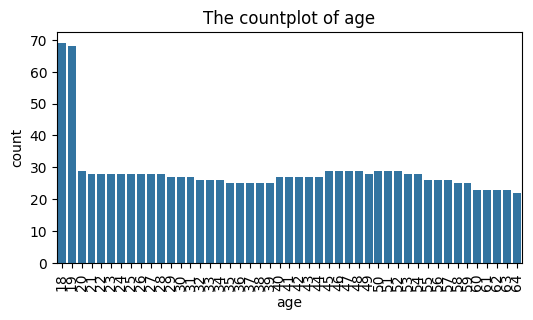

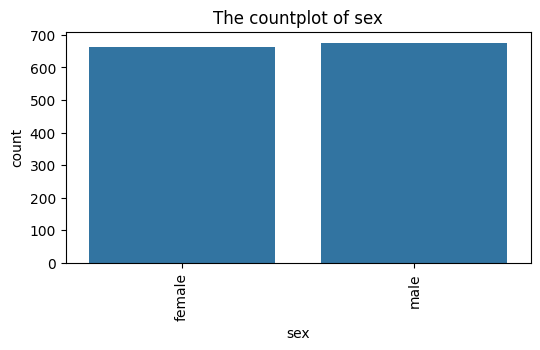

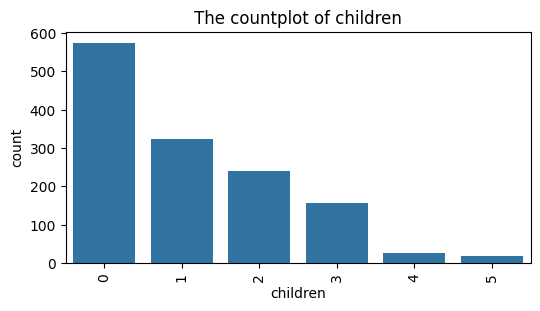

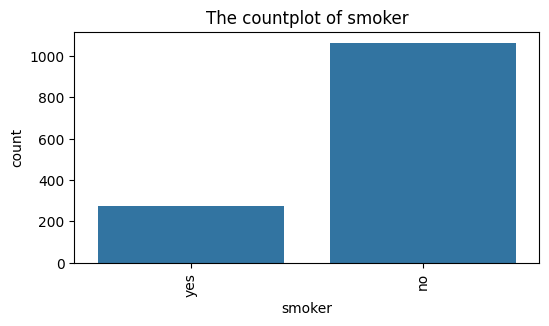

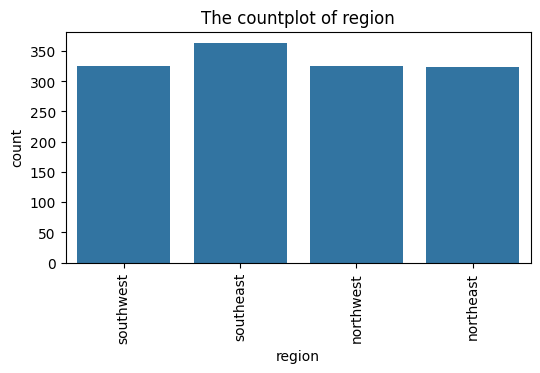

In [79]:
features = ['age','sex','children', 'smoker', 'region']
# Loop through each feature in the list
for i, feature in enumerate(features):
    # Create a new figure with specified size
    plt.figure(figsize=(6, 3))
    
    # Create a count plot for the current feature
    sns.countplot(x=feature, data=cost)
    
    # Set the title of the plot
    plt.title(f'The countplot of {feature}')
    
    # Rotate x-axis labels by 90 degrees for better readability
    plt.xticks(rotation=90)
    
    # Display the plot
    plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_11308\3442002818.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cost[column], shade=True, color='skyblue')  # Create density plot


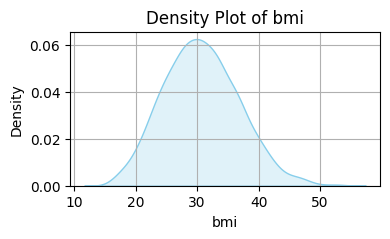

C:\Users\Hp\AppData\Local\Temp\ipykernel_11308\3442002818.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cost[column], shade=True, color='skyblue')  # Create density plot


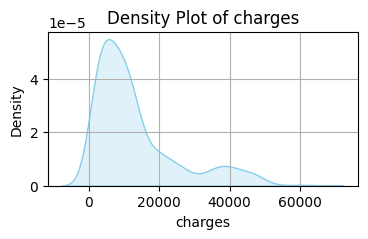

In [80]:
numeric_columns = ['bmi','charges']

# Loop through each numeric column and create density plots
for column in numeric_columns:
    plt.figure(figsize=(4, 2))  # Set the figure size
    sns.kdeplot(data=cost[column], shade=True, color='skyblue')  # Create density plot
    plt.title(f'Density Plot of {column}')  # Set the title
    plt.xlabel(column)  # Set the x-axis label
    plt.ylabel('Density')  # Set the y-axis label
    plt.grid(True)  # Show grid
    plt.show()  # Display the density plot

In [81]:
cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
encoded_sex = pd.get_dummies(cost['sex'], prefix='sex')
encoded_region = pd.get_dummies(cost['region'], prefix='region')
encoded_smoker = pd.get_dummies(cost['smoker'], prefix='smoker')
encoded_children = pd.get_dummies(cost['children'], prefix='children')
cost = pd.concat([cost, encoded_children, encoded_region, encoded_sex, encoded_smoker], axis=1)
cost.drop(['sex','region','smoker', 'children'], axis=1, inplace=True)

In [83]:
boolean_column = cost.select_dtypes(include=['bool']).columns
for col in boolean_column:
    cost[col] = cost[col].astype(int)

In [84]:
cost.head()

,age,bmi,charges,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,16884.92400,1,0,0,0,0,0,0,0,0,1,1,0,0,1
1,18,33.770,1725.55230,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,28,33.000,4449.46200,0,0,0,1,0,0,0,0,1,0,0,1,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0,0,1,1,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0,0,1,1,0


In [85]:
X = cost.drop('charges', axis=1)
y=cost['charges']

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature importances:\n", feature_importances)

Feature importances:
 age                 0.128741
bmi                 0.205336
children_0          0.007192
children_1          0.005007
children_2          0.004307
children_3          0.002060
children_4          0.003777
children_5          0.000290
region_northeast    0.005170
region_northwest    0.004872
region_southeast    0.004367
region_southwest    0.003201
sex_female          0.003265
sex_male            0.003268
smoker_no           0.371185
smoker_yes          0.247962
dtype: float64


## Insights
Smoking status is the most critical factor, significantly influencing insurance charges. This makes sense because smoking is a major risk factor for many health conditions, leading to higher medical expenses.

BMI and age are also important predictors, aligning with the understanding that higher BMI and older age are associated with increased health risks and costs.

Children and region have relatively low importance, suggesting that while they do contribute to the prediction, they are less influential than other factors.

Gender has minimal importance, implying that insurance charges are relatively unaffected by the sex of the individual when other variables are considered.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1070, 16) (268, 16) (1070,) (268,)


In [114]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
# Initialize and fit the RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, bootstrap=True)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 2551.209105162345
Mean Squared Error (MSE): 21372360.01866649
Root Mean Squared Error (RMSE): 4623.024985728121
R^2 Score: 0.8623347204624406


In [95]:
from sklearn.linear_model import LinearRegression
# Initialize and fit the LinearRegression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 4232.848222004943
Mean Squared Error (MSE): 33773633.40578479
Root Mean Squared Error (RMSE): 5811.508703063671
R^2 Score: 0.7824546900882444


In [96]:
from sklearn.tree import DecisionTreeRegressor
# Initialize and fit the DecisionTreeRegressor model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 3423.68735691791
Mean Squared Error (MSE): 51570279.86831721
Root Mean Squared Error (RMSE): 7181.245008236191
R^2 Score: 0.6678215701166622


In [97]:
from sklearn.svm import SVR
# Initialize and fit the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 6849.3103258404
Mean Squared Error (MSE): 127890580.064219
Root Mean Squared Error (RMSE): 11308.871741434643
R^2 Score: 0.1762214168494135


In [98]:
from xgboost import XGBRegressor
# Initialize and fit the XGBRegressor model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 2726.227708278648
Mean Squared Error (MSE): 23781167.395041242
Root Mean Squared Error (RMSE): 4876.59383125571
R^2 Score: 0.8468189262061611


In [99]:
from sklearn.neighbors import KNeighborsRegressor
# Initialize and fit the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 3908.7389395932837
Mean Squared Error (MSE): 38291477.19251797
Root Mean Squared Error (RMSE): 6188.010762152727
R^2 Score: 0.7533540092432446


From the above R^2 scores of different model we can conclude that randomforestregressor is the best model for this task 